# Controlling the measuring instrument 'Yokogawa GP10' by web interface

In [1]:
# import necessary libraries
import urllib as http
import pandas as pd
import time
import os

In [2]:
ip_of_gp10 = '192.168.10.207'

## Recording data to SD card

### Set the file type of recorded file to 'Text'

With this setting, ASCII text files are written to the SD card. These can be read in as CSV files in common spreadsheet programs. A tabulator is used as column separator.

**Attention:** This file format is NOT readable in the tool *Universal Viewer*! Therefore, for other colleagues, the format must be changed back to "Binary" at the end of the measurement!

In [3]:
# URI for setting the file type
file_type = "Text"
str_uri = "http://" + ip_of_gp10 + "/gene.cgi?msg=SDirectory,'DATA0';SFileHead,'';SFileName,Date,'';SMediaSave,On,Off;SFileFormat," + file_type

str_uri

"http://192.168.10.207/gene.cgi?msg=SDirectory,'DATA0';SFileHead,'';SFileName,Date,'';SMediaSave,On,Off;SFileFormat,Text"

In [4]:
# Set the file type by http GET request
str_response = http.request.urlopen(str_uri).read().decode('utf-8')
str_response = str_response.replace('\r\n', '')

if (str_response == 'E0'):
    print("Setting file type was successful: {}".format(str_response))
else:
    print("There was an error while setting the file type: {}".format(str_response))

Setting file type was successful: E0


## Configure the recording channels for the measurement

In [5]:
# Helper function for building the config URI and write the configurations
def config_meas_rec_channel(str_channel, str_name, str_color):
    str_uri = "http://" + ip_of_gp10 + "/gene.cgi?msg=STagIO," + str_channel + ",'" + str_name + "','';" \
               "SColorIO," + str_channel + "," + str_color + ";" \
               "SZoneIO," + str_channel + ",0,100;" \
               "SScaleIO," + str_channel + ",1,10;" \
               "SBarIO," + str_channel + ",Lower,10;" \
               "SBandIO," + str_channel + ",Off,102,255,0,0,100;" \
               "SAlmMarkIO," + str_channel + ",On,Alarm,255,0,0,255,153,51,255,153,51,255,0,0;" \
               "SValueIO," + str_channel + ",'',''"
    
    str_response = http.request.urlopen(str_uri).read().decode('utf-8')
    str_response = str_response.replace('\r\n', '')

    if (str_response == 'E0'):
        print("Configuring the channel was successful: {}".format(str_response))
    else:
        print("Configuring the channel was NOT successful: {}".format(str_response))
    
    return str_uri, str_response

In [6]:
# Dataframe with the config values for the measuring channels
df_meas_rec_channels = pd.DataFrame(columns=['Channel', 'Track Name', 'Color RGB'],
                                    data=[['0001', 'T01_Klemme_Schliesser_E1', '255,0,0'],
                                          ['0002', 'T02_Klemme_Schliesser_E2', '0,153,51'],
                                          ['0003', 'T03_Kabeleinfuehrung_innen', '0,51,255'],
                                          ['0004', 'T04_Griffstueck_aussen', '204,102,204'],
                                          ['0005', 'T05_Gehaeuse_aussen', '119,170,221'],
                                          ['0006', 'T06_Raumtemperatur_1', '255,153,51'],
                                          ['0007', 'T07_Raumtemperatur_2', '153,204,51'],
                                         ])


display(df_meas_rec_channels)

,Channel,Track Name,Color RGB
0,0001,T01_Klemme_Schliesser_E1,"255,0,0"
1,0002,T02_Klemme_Schliesser_E2,"0,153,51"
2,0003,T03_Kabeleinfuehrung_innen,"0,51,255"
3,0004,T04_Griffstueck_aussen,"204,102,204"
4,0005,T05_Gehaeuse_aussen,"119,170,221"
5,0006,T06_Raumtemperatur_1,"255,153,51"
6,0007,T07_Raumtemperatur_2,"153,204,51"


In [64]:
# Iterate the config dataframe and upload the configurations
for index, row in df_meas_rec_channels.iterrows():
    print("Channel: {}, Track Name: {}, Color RGB: {}\r\n".format(row['Channel'], row['Track Name'], row['Color RGB']))
    
    str_uri, str_response = config_meas_rec_channel(row['Channel'], row['Track Name'], row['Color RGB'])

    print("URI: {}\r\nResponse: {}\r\n".format(str_uri, str_response))

Channel: 0001, Track Name: T01_Klemme_Schliesser_E1, Color RGB: 255,0,0

Configuring the channel was successful: E0
URI: http://192.168.10.207/gene.cgi?msg=STagIO,0001,'T01_Klemme_Schliesser_E1','';SColorIO,0001,255,0,0;SZoneIO,0001,0,100;SScaleIO,0001,1,10;SBarIO,0001,Lower,10;SBandIO,0001,Off,102,255,0,0,100;SAlmMarkIO,0001,On,Alarm,255,0,0,255,153,51,255,153,51,255,0,0;SValueIO,0001,'',''
Response: E0

Channel: 0002, Track Name: T02_Klemme_Schliesser_E2, Color RGB: 0,153,51

Configuring the channel was successful: E0
URI: http://192.168.10.207/gene.cgi?msg=STagIO,0002,'T02_Klemme_Schliesser_E2','';SColorIO,0002,0,153,51;SZoneIO,0002,0,100;SScaleIO,0002,1,10;SBarIO,0002,Lower,10;SBandIO,0002,Off,102,255,0,0,100;SAlmMarkIO,0002,On,Alarm,255,0,0,255,153,51,255,153,51,255,0,0;SValueIO,0002,'',''
Response: E0

Channel: 0003, Track Name: T03_Kabeleinfuehrung_innen, Color RGB: 0,51,255

Configuring the channel was successful: E0
URI: http://192.168.10.207/gene.cgi?msg=STagIO,0003,'T03_Kabe

## Configure the display range for the measurement tracks

In [59]:
# Helper function for building the config URI and write the configurations
def config_meas_display_ranges(str_channel, flt_range_lower, flt_range_upper):
    str_uri = "http://" + ip_of_gp10 + "/gene.cgi?msg=SRangeAI," + str_channel + ",TC,K,Off," + \
               str(flt_range_lower*10) + "," + str(flt_range_upper*10) + ",0;" \
               "SMoveAve," + str_channel + ",Off,2;" \
               "SBurnOut," + str_channel + ",Off;" \
               "SRjc," + str_channel + ",Internal"
    
    #print(str_uri)
    
    str_response = http.request.urlopen(str_uri).read().decode('utf-8')
    str_response = str_response.replace('\r\n', '')

    if (str_response == 'E0'):
        print("Configuring the channel was successful: {}".format(str_response))
    else:
        print("Configuring the channel was NOT successful: {}".format(str_response))
    
    return str_uri, str_response

In [61]:
# Dataframe with the config values for the display ranges for the measurement tracks
df_meas_display_ranges = pd.DataFrame(columns=['Channel', 'range_lower [°C]', 'range_upper [°C]'],
                                    data=[['0001', 20, 85],
                                          ['0002', 20, 85],
                                          ['0003', 20, 85],
                                          ['0004', 20, 85],
                                          ['0005', 20, 85],
                                          ['0006', 20, 85],
                                          ['0007', 20, 85],
                                         ])


display(df_meas_display_ranges)

,Channel,range_lower [°C],range_upper [°C]
0,0001,20,85
1,0002,20,85
2,0003,20,85
3,0004,20,85
4,0005,20,85
5,0006,20,85
6,0007,20,85


In [63]:
# Iterate the config dataframe and upload the configurations
for index, row in df_meas_display_ranges.iterrows():
    print("Channel: {}, Range lower limit: {}, Range upper limit: {}\r\n".format(row['Channel'], row['range_lower [°C]'], row['range_upper [°C]']))
    
    str_uri, str_response = config_meas_display_ranges(row['Channel'], row['range_lower [°C]'], row['range_upper [°C]'])

    print("URI: {}\r\nResponse: {}\r\n".format(str_uri, str_response))

Channel: 0001, Range lower limit: 20, Range upper limit: 85

Configuring the channel was successful: E0
URI: http://192.168.10.207/gene.cgi?msg=SRangeAI,0001,TC,K,Off,200,850,0;SMoveAve,0001,Off,2;SBurnOut,0001,Off;SRjc,0001,Internal
Response: E0

Channel: 0002, Range lower limit: 20, Range upper limit: 85

Configuring the channel was successful: E0
URI: http://192.168.10.207/gene.cgi?msg=SRangeAI,0002,TC,K,Off,200,850,0;SMoveAve,0002,Off,2;SBurnOut,0002,Off;SRjc,0002,Internal
Response: E0

Channel: 0003, Range lower limit: 20, Range upper limit: 85

Configuring the channel was successful: E0
URI: http://192.168.10.207/gene.cgi?msg=SRangeAI,0003,TC,K,Off,200,850,0;SMoveAve,0003,Off,2;SBurnOut,0003,Off;SRjc,0003,Internal
Response: E0

Channel: 0004, Range lower limit: 20, Range upper limit: 85

Configuring the channel was successful: E0
URI: http://192.168.10.207/gene.cgi?msg=SRangeAI,0004,TC,K,Off,200,850,0;SMoveAve,0004,Off,2;SBurnOut,0004,Off;SRjc,0004,Internal
Response: E0

Channel:

## Start the recording

In [8]:
# URI for starting (0) the recording of measurements
start_stop = "0"
str_uri = "http://" + ip_of_gp10 + "/gene.cgi?msg=ORec," + start_stop

str_uri

'http://192.168.10.207/gene.cgi?msg=ORec,0'

In [9]:
# Start the recording
str_response = http.request.urlopen(str_uri).read().decode('utf-8')
str_response = str_response.replace('\r\n', '')

if (str_response == 'E0'):
    print("Start the recording was successful: {}".format(str_response))
else:
    print("There was an error: {}".format(str_response))

Start the recording was successful: E0


## Stop the recording

In [11]:
# URI for stopping (1) the recording of measurements
start_stop = "1"
str_uri = "http://" + ip_of_gp10 + "/gene.cgi?msg=ORec," + start_stop

str_uri

'http://192.168.10.207/gene.cgi?msg=ORec,1'

In [12]:
# Stop the recording
str_response = http.request.urlopen(str_uri).read().decode('utf-8')
str_response = str_response.replace('\r\n', '')

if (str_response == 'E0'):
    print("Stop the recording was successful: {}".format(str_response))
else:
    print("There was an error: {}".format(str_response))

Stop the recording was successful: E0


### Set the file type of recorded file to 'Binary'

This format is the default setting of the measuring device. The resulting **GDS** files can be further processed by the Windows tool *Universal Viewer*.

The specification of the GDS file format is kept secret after inquiry with the Yokogawa support -- for "security" reasons was said there ... But this is quite nonsense, because "security by obscurity" is not a good security approach, as several incidents have impressively shown ...

In [13]:
# URI for setting the file type
file_type = "Binary"
str_uri = "http://" + ip_of_gp10 + "/gene.cgi?msg=SDirectory,'DATA0';SFileHead,'';SFileName,Date,'';SMediaSave,On,Off;SFileFormat," + file_type

str_uri

"http://192.168.10.207/gene.cgi?msg=SDirectory,'DATA0';SFileHead,'';SFileName,Date,'';SMediaSave,On,Off;SFileFormat,Binary"

In [14]:
# Set the file type by http GET request
str_response = http.request.urlopen(str_uri).read().decode('utf-8')
str_response = str_response.replace('\r\n', '')

if (str_response == 'E0'):
    print("Setting file type was successful: {}".format(str_response))
else:
    print("There was an error while setting the file type: {}".format(str_response))

Setting file type was successful: E0


## Read in the file list from SD card

In [15]:
# URI for getting the file list
str_uri = 'http://' + ip_of_gp10 + '/gene.cgi?msg=FMedia,DIR,%27/DRV0/DATA0/%27,1'

# Convert byte stream from the http response to string 
str_file_list = http.request.urlopen(str_uri).read().decode('utf-8')

# Split string by '\r\n' and convert it to a list
lst_file_list = list(str_file_list.split('\r\n'))
lst_file_list

['EA',
 '20/12/09 12:47:34      <DIR> .',
 '20/12/09 12:47:34      <DIR> ..',
 '20/12/09 12:47:34     424432 000086_201209_080310.GDS',
 '21/03/18 15:35:58      15328 000087_210318_153110.GDS',
 '21/03/18 15:45:14      12640 000088_210318_154210.GDS',
 '21/03/18 16:13:44       8984 000089_210318_161310.GDS',
 '21/03/18 16:27:08      25816 000090_210318_161510.GDS',
 '21/03/19 09:50:04     110240 000091_210319_084020.GDS',
 '21/03/25 16:59:18      19440 000092_210325_165150.GDS',
 '21/03/26 16:59:00     430832 000093_210326_121020.GDS',
 '21/03/31 18:48:44     597960 000094_210331_120550.GDS',
 '21/04/01 16:48:50     425936 000095_210401_120330.GDS',
 '21/04/06 17:15:20     277344 000096_210406_141130.GDS',
 '21/04/07 16:02:48     559048 000094_210331_120550.GDS.vdx',
 '21/04/07 16:06:02     559048 000095_210401_120330.GDS.vdx',
 '21/04/07 16:09:18     559048 000096_210406_141130.GDS.vdx',
 '21/04/08 16:52:34     460344 000097_210408_114340.GDS',
 '21/04/15 09:26:40       5850 000098_21

In [16]:
# Read file list to dataframe
df_file_list = pd.DataFrame(lst_file_list)

# Drop first 3 and last 2 rows
df_file_list.drop([0, 1, 2], inplace=True)
df_file_list.drop(df_file_list.tail(2).index, inplace=True)

# Split single column into multiple ones
df_file_list_split = df_file_list[0].str.split(expand=True)

# Reset the index of dataframe and avoid the old index being added as a column
df_file_list_split.reset_index(drop=True, inplace=True)

# display the last (i.e. newest) files
df_file_list_split.tail(8)

,0,1,2,3
48,23/02/21,09:45:38,8365,000136_230221_093620.GTD
49,23/02/21,13:45:44,175890,000137_230221_094920.GTD
50,23/02/21,16:21:00,109818,000138_230221_135410.GTD
51,23/02/22,11:20:18,4486,000141_230222_111620.GTD
52,23/02/22,11:24:14,5608,000142_230222_112340.GDS
53,23/02/22,11:30:08,8736,000143_230222_112550.GDS
54,23/02/24,14:28:50,23560,000144_230224_140620.GDS
55,23/02/24,17:15:30,120722,000145_230224_143400.GTD


In [17]:
# Rename columns by column index
df_file_list_new = df_file_list_split.rename(columns={ df_file_list_split.columns[0]: "Date", 
                                                       df_file_list_split.columns[1]: "Time",
                                                       df_file_list_split.columns[2]: "File size",
                                                       df_file_list_split.columns[3]: "File name" })

df_file_list_new.head(3)

,Date,Time,File size,File name
0,20/12/09,12:47:34,424432,000086_201209_080310.GDS
1,21/03/18,15:35:58,15328,000087_210318_153110.GDS
2,21/03/18,15:45:14,12640,000088_210318_154210.GDS


In [18]:
# Combine date and time columns to a new datetime array
# Hints:
# Parameter 'format="%y/%m/%d %H:%M:%S"' defines the INPUT data format of the raw original string
# With method '.dt.strftime('%d.%m.%Y, %H:%M:%S')' you can define the OUTPUT data format
new_dt_column = pd.to_datetime(df_file_list_new['Date'] + ' ' + df_file_list_new['Time'], format="%y/%m/%d %H:%M:%S") #.dt.strftime('%d.%m.%Y, %H:%M:%S')

# Replace values of 'Date' row with new datetime array
df_file_list_new['Date'] = new_dt_column

# Rename row to 'Datetime'
df_file_list_new = df_file_list_new.rename(columns={'Date': 'Datetime'})

# Delete unused row 'Time'
del df_file_list_new['Time']

# Cast values to correct data types
df_file_list_new['File size'] = df_file_list_new['File size'].astype(int)
df_file_list_new['File name'] = df_file_list_new['File name'].astype(str)

In [19]:
# View first 5 files in the list
df_file_list_new.head(5)

,Datetime,File size,File name
0,2020-12-09 12:47:34,424432,000086_201209_080310.GDS
1,2021-03-18 15:35:58,15328,000087_210318_153110.GDS
2,2021-03-18 15:45:14,12640,000088_210318_154210.GDS
3,2021-03-18 16:13:44,8984,000089_210318_161310.GDS
4,2021-03-18 16:27:08,25816,000090_210318_161510.GDS


In [20]:
df_file_list_new.dtypes

Datetime     datetime64[ns]
File size             int64
File name            object
dtype: object

In [21]:
# Delete rows with file types other than GTD
# '~' negates the search string
df_file_list_new.drop(df_file_list_new[~df_file_list_new['File name'].str.contains("GTD")].index, inplace=True)

# Reset the index of dataframe and avoid the old index being added as a column
df_file_list_new.reset_index(drop=True, inplace=True)

In [22]:
# Sort the dataframe by column 'Datetime' descending to get the newest file on top
df_file_list_new.sort_values(by='Datetime', ascending=False, inplace=True)

In [23]:
#display(df_file_list_new)
df_file_list_new

,Datetime,File size,File name
17,2023-02-24 17:15:30,120722,000145_230224_143400.GTD
16,2023-02-22 11:20:18,4486,000141_230222_111620.GTD
15,2023-02-21 16:21:00,109818,000138_230221_135410.GTD
14,2023-02-21 13:45:44,175890,000137_230221_094920.GTD
13,2023-02-21 09:45:38,8365,000136_230221_093620.GTD
12,2023-02-21 09:36:00,21149,000135_230221_090910.GTD
11,2023-02-20 17:30:58,14380,000133_230220_171330.GTD
10,2023-02-20 17:11:34,57932,000132_230220_155500.GTD
9,2023-02-20 15:53:38,42803,000131_230220_145740.GTD
8,2023-02-20 14:57:24,1965,000130_230220_145640.GTD


## Download GTD files to local file system

In [24]:
# get the file name by its index
#str_file_name_remote = df_file_list_new['File name'][14] # 6 A
#str_file_name_remote = df_file_list_new['File name'][15] # 4 A
str_file_name_remote = df_file_list_new['File name'][17] # 10 A

str_file_name_remote

'000145_230224_143400.GTD'

In [25]:
def string_slice_n_resample(str_input, int_slice_len=2, str_sep='-'):
    # slice input string and resample it
    str_ret = ''
    for i in range(0, len(str_input), int_slice_len):
        str_ret = str_ret + str_input[i:i+int_slice_len] + str_sep
        
    return str_ret

In [26]:
# split remote file name by '_' and get date and starting time
str_file_date = str_file_name_remote.split('_')[1]
# ... and cut file extension
str_file_time = str_file_name_remote.split('_')[2].replace('.GTD', '')

In [27]:
print('File date: {}, file time: {}'.format(str_file_date, str_file_time))

File date: 230224, file time: 143400


In [28]:
# extend file prefix by date
str_file_date_pref = '20' + string_slice_n_resample(str_file_date, 2, '-')

# replace last '-' of string with '_'
str_file_date_pref = str_file_date_pref[:-1] + '_'
str_file_date_pref

'2023-02-24_'

In [29]:
# extend file prefix by time
str_file_date_pref = str_file_date_pref + string_slice_n_resample(str_file_time, 2, '_')
str_file_date_pref

'2023-02-24_14_34_00_'

In [30]:
# set context of measurement
#str_measure_context = 'Erwaermungspruefung_ZSR2B2_4A'
#str_measure_context = 'Erwaermungspruefung_ZSR2B2_6A'
str_measure_context = 'Erwaermungspruefung_ZSR2B2_10A'

str_file_name_local = str_file_date_pref + str_measure_context + '.GTD'
str_file_name_local

'2023-02-24_14_34_00_Erwaermungspruefung_ZSR2B2_10A.GTD'

In [31]:
# Expand the download URI by file name
file_url = 'http://' + ip_of_gp10 + '/DRV0/DATA0/'
file_url = file_url + str_file_name_remote

file_url

'http://192.168.10.207/DRV0/DATA0/000145_230224_143400.GTD'

In [32]:
file_dest = './data_files/' + str_file_name_local
file_dest

'./data_files/2023-02-24_14_34_00_Erwaermungspruefung_ZSR2B2_10A.GTD'

In [33]:
ret = http.request.urlretrieve(file_url, file_dest)

In [34]:
ret

('./data_files/2023-02-24_14_34_00_Erwaermungspruefung_ZSR2B2_10A.GTD',
 <http.client.HTTPMessage at 0x7fe28b2d3820>)

## Read in and plot recorded data from ASCII based GTD files

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
https://pythonspot.com/reading-csv-files-in-python/  
https://stackoverflow.com/questions/7856296/parsing-csv-tab-delimited-txt-file-with-python  
https://www.datacamp.com/community/tutorials/pandas-read-csv

In [35]:
import pandas as pd

def create_dictionary_from_csv(filename, offset=0, cols_wanted=1):
    my_dataframe = pd.read_csv(filename, sep='\t', index_col=False, decimal='.', header=offset)
    # Here you can delete the dataframe columns you dont want!
    if 'Tag Comment' in my_dataframe.columns:
        del my_dataframe['Tag Comment']
    
    # Delete all cloumns after the desired ones
    my_dataframe.drop(my_dataframe.columns[cols_wanted:], axis=1, inplace=True)

    return my_dataframe

In [36]:
# list downloaded data files (*.GTD)
lst_file_list_local = []
for file in os.listdir('./data_files/'):
    if file.endswith('.GTD'):
        #print(file)
        lst_file_list_local.append(file)

# prevent truncation of file names while displaying the dataframe
pd.set_option('display.max_colwidth', None)
# read file list to dataframe
df_file_list = pd.DataFrame(lst_file_list_local, columns=['Local data files'])
df_file_list

,Local data files
0,2023-02-21_13_54_10_Erwaermungspruefung_ZSR2B2_4A.GTD
1,2023-02-24_14_34_00_Erwaermungspruefung_ZSR2B2_10A.GTD
2,2023-02-21_09_49_20_Erwaermungspruefung_ZSR2B2_6A.GTD


In [37]:
#str_file_name_local = df_file_list['Local data files'][0] # 4 A
#str_file_name_local = df_file_list['Local data files'][2] # 6 A
str_file_name_local = df_file_list['Local data files'][1] # 10 A

df = create_dictionary_from_csv(filename="./data_files/" + str_file_name_local, offset=24, cols_wanted=15)

In [39]:
df.head(6)

,Tag,T01_Klemme_Schliesser_E1,T01_Klemme_Schliesser_E1.1,T02_Klemme_Schliesser_E2,T02_Klemme_Schliesser_E2.1,T03_Kabeleinfuehrung_innen,T03_Kabeleinfuehrung_innen.1,T04_Griffstueck_aussen,T04_Griffstueck_aussen.1,T05_Gehaeuse_aussen,T05_Gehaeuse_aussen.1,T06_Raumtemperatur_1,T06_Raumtemperatur_1.1,T07_Raumtemperatur_2,T07_Raumtemperatur_2.1
0,Unit,°C,°C,°C,°C,°C,°C,°C,°C,°C,°C,°C,°C,°C,°C
1,Type,Meas,Meas,Meas,Meas,Meas,Meas,Meas,Meas,Meas,Meas,Meas,Meas,Meas,Meas
2,Kind,Min,Max,Min,Max,Min,Max,Min,Max,Min,Max,Min,Max,Min,Max
3,Sampling Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/02/24 14:34:00,26.1,26.2,26.4,26.4,24.4,24.4,23.8,23.8,25.2,25.3,23.0,23.0,22.8,22.8
5,2023/02/24 14:34:10,26.1,26.1,26.3,26.4,24.4,24.4,23.8,23.8,25.2,25.2,23.0,23.0,22.8,22.8


In [40]:
# rename the columns and drop columns with min values
# because there is no diffenrence between min and max columns
for col in df.columns:
    if (col == 'Tag'):
        df.rename(columns={"Tag": "Datetime"}, inplace=True)
    
    # drop columns with min values
    elif (df[col][2] == 'Min'):
        df.drop(columns=[col], axis=1, inplace=True)
    
    # remove '.1' from column name holding the max values
    elif (df[col][2] == 'Max'):
        df.rename(columns={col: col.replace('.1', '')}, inplace=True)

df

,Datetime,T01_Klemme_Schliesser_E1,T02_Klemme_Schliesser_E2,T03_Kabeleinfuehrung_innen,T04_Griffstueck_aussen,T05_Gehaeuse_aussen,T06_Raumtemperatur_1,T07_Raumtemperatur_2
0,Unit,°C,°C,°C,°C,°C,°C,°C
1,Type,Meas,Meas,Meas,Meas,Meas,Meas,Meas
2,Kind,Max,Max,Max,Max,Max,Max,Max
3,Sampling Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/02/24 14:34:00,26.2,26.4,24.4,23.8,25.3,23.0,22.8
...,...,...,...,...,...,...,...,...
968,2023/02/24 17:14:40,36.2,36.9,28.3,27.5,34.3,23.6,23.6
969,2023/02/24 17:14:50,36.2,36.8,28.3,27.5,34.3,23.6,23.6
970,2023/02/24 17:15:00,36.1,36.7,28.2,27.4,34.2,23.6,23.6
971,2023/02/24 17:15:10,36.0,36.6,28.2,27.4,34.1,23.6,23.6


In [41]:
# delete not used rows
# and make a deep copy first
df_clean = df.copy(deep=True)

for index, row in df_clean.iterrows():
    # compare string with multiple values in list
    str_identifiers = {'Unit', 'Type', 'Kind', 'Sampling Data'}
    if row['Datetime'] in str_identifiers:
        #print(index)
        df_clean.drop(index, axis=0, inplace=True)

# reset the index of dataframe and avoid the old index being added as a column
df_clean.reset_index(drop=True, inplace=True)

df_clean

,Datetime,T01_Klemme_Schliesser_E1,T02_Klemme_Schliesser_E2,T03_Kabeleinfuehrung_innen,T04_Griffstueck_aussen,T05_Gehaeuse_aussen,T06_Raumtemperatur_1,T07_Raumtemperatur_2
0,2023/02/24 14:34:00,26.2,26.4,24.4,23.8,25.3,23.0,22.8
1,2023/02/24 14:34:10,26.1,26.4,24.4,23.8,25.2,23.0,22.8
2,2023/02/24 14:34:20,26.1,26.3,24.4,23.8,25.3,23.0,22.8
3,2023/02/24 14:34:30,26.1,26.3,24.4,23.8,25.2,23.0,22.9
4,2023/02/24 14:34:40,27.5,26.8,24.4,23.8,25.2,22.9,23.0
...,...,...,...,...,...,...,...,...
964,2023/02/24 17:14:40,36.2,36.9,28.3,27.5,34.3,23.6,23.6
965,2023/02/24 17:14:50,36.2,36.8,28.3,27.5,34.3,23.6,23.6
966,2023/02/24 17:15:00,36.1,36.7,28.2,27.4,34.2,23.6,23.6
967,2023/02/24 17:15:10,36.0,36.6,28.2,27.4,34.1,23.6,23.6


In [42]:
# convert strings to floats in dataframe and replace german decimal ',' with international '.'
for col in df_clean.columns:
    if ( (col != 'Datetime') and
         (df_clean[col].dtypes != 'float64') ):
        df_clean[col] = df_clean[col].str.replace(',', '.').astype(float)

df_clean.head(5)

,Datetime,T01_Klemme_Schliesser_E1,T02_Klemme_Schliesser_E2,T03_Kabeleinfuehrung_innen,T04_Griffstueck_aussen,T05_Gehaeuse_aussen,T06_Raumtemperatur_1,T07_Raumtemperatur_2
0,2023/02/24 14:34:00,26.2,26.4,24.4,23.8,25.3,23.0,22.8
1,2023/02/24 14:34:10,26.1,26.4,24.4,23.8,25.2,23.0,22.8
2,2023/02/24 14:34:20,26.1,26.3,24.4,23.8,25.3,23.0,22.8
3,2023/02/24 14:34:30,26.1,26.3,24.4,23.8,25.2,23.0,22.9
4,2023/02/24 14:34:40,27.5,26.8,24.4,23.8,25.2,22.9,23.0


In [43]:
# convert column 'Datetime' to variable type datetime64
df_clean['Datetime'] = pd.to_datetime(df_clean['Datetime'])

df_clean.dtypes

Datetime                      datetime64[ns]
T01_Klemme_Schliesser_E1             float64
T02_Klemme_Schliesser_E2             float64
T03_Kabeleinfuehrung_innen           float64
T04_Griffstueck_aussen               float64
T05_Gehaeuse_aussen                  float64
T06_Raumtemperatur_1                 float64
T07_Raumtemperatur_2                 float64
dtype: object

## Plot data from dataframe

In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
#%matplotlib notebook

# FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. 
# Future versions of pandas will require you to explicitly register matplotlib converters.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [45]:
# specify measurement conditions
str_measurement_type = 'Erwärmungsprüfung'
str_measurement_specimen = 'ZSR2B2'

#str_measurement_current = '4 A DC'
#str_measurement_current = '6 A DC'
str_measurement_current = '10 A DC'

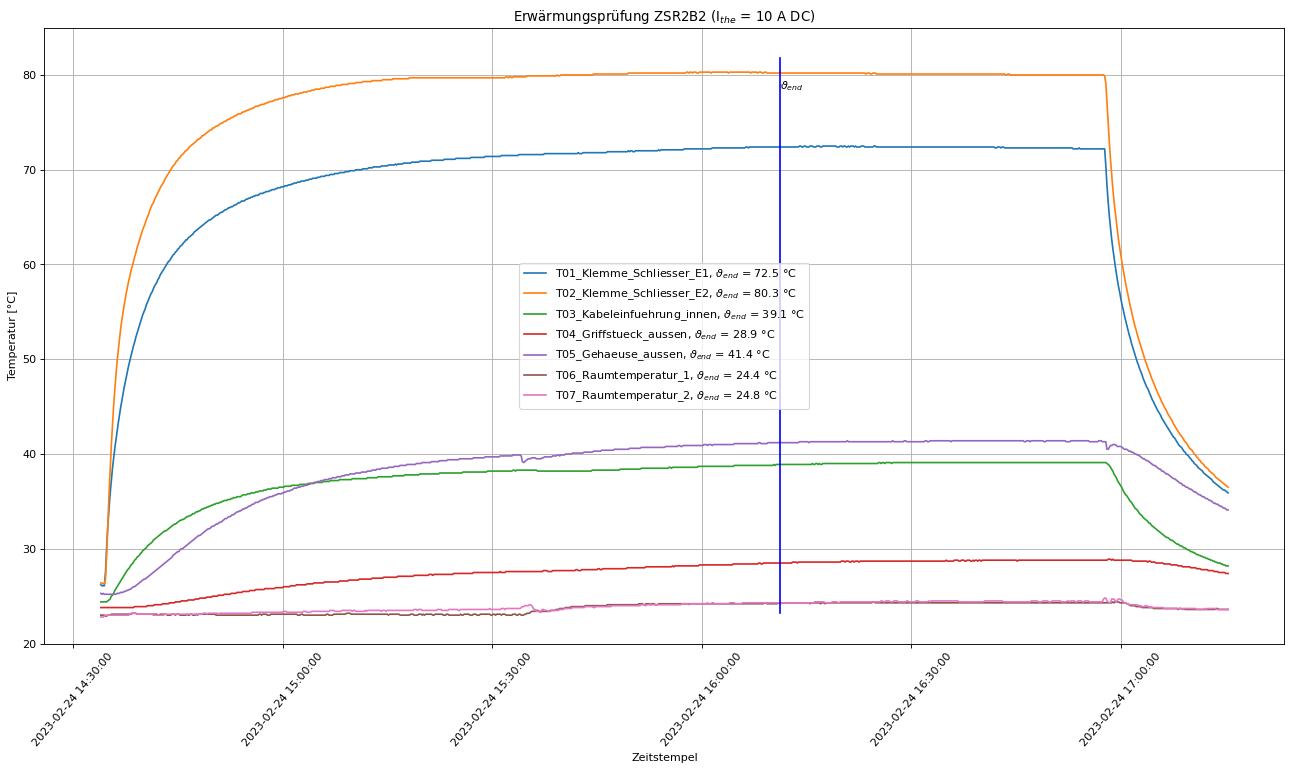

In [46]:
# figsize: a tuple (width, height) in inches
plt.figure(num=0, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
axes.xaxis.set_major_formatter(xfmt)

str_title = str_measurement_type + ' ' + str_measurement_specimen + ' (I$_{the}$ = ' + str_measurement_current + ')'
plt.title(str_title)

# iterate over all columns of the dataframe and create a plot line for each of them
for col in df_clean.columns:
    if (col != 'Datetime'):
        str_label = df_clean[col].name + r', $\vartheta_{end}$ = ' + str(df_clean[col].max()) + ' °C'
        plt.plot(df_clean['Datetime'], df_clean[col], '-', label=str_label)

plt.xlabel('Zeitstempel')
plt.ylabel('Temperatur [°C]')

if (str_measurement_current == '4 A DC'):
    plt.ylim(20, 40)
elif (str_measurement_current == '6 A DC'):
    plt.ylim(20, 55)
elif (str_measurement_current == '10 A DC'):
    plt.ylim(20, 85)

plt.grid(True)

plt.setp(plt.gca().xaxis.get_majorticklabels(), 'rotation', 50)

plt.legend()

# the x coords of this transformation are data, and the
# y coord are axes
ax = plt.gca()
trans = ax.get_xaxis_transform()

# draw a vertical cursor on the position of the last occurances 
# of the maximum value of a given column
#col = 'Klemme Schließer 2'
col = 'T02_Klemme_Schliesser_E2'
# get first occurances of maximum values (default)
#max_idx = df_clean[col].idxmax()
# get the last occurances of maximum values
max_idx = df_clean.loc[::-1, col].idxmax()
#print(df_clean['Datetime'][max_idx])
plt.axvline(x = df_clean['Datetime'][max_idx], ymin = 0.05, ymax = 0.95,
            color = 'b', label = 'axvline - full height')
plt.text(df_clean['Datetime'][max_idx], 0.9, r'$\vartheta_{end}$', transform=trans)

# save plot as PNG or PDF figure
# in order to obtain the same figure as shown in the notebook, the option 'bbox_inches = "tight"'
# has to be used - it basically extends or shrinks the bounding box such that all objects in the canvas are displayed
# found here: https://stackoverflow.com/a/45239920
str_image_file_path = './data_files/' + str_file_name_local.replace('.GTD', '.png')
plt.savefig(str_image_file_path, bbox_inches = 'tight')
#plt.savefig(_str_filepath + '.pdf', dpi=150, bbox_inches = 'tight')

plt.show()